# Задача 4.3

In [1]:
import numpy as np
import math as mth
import scipy.stats as sps
import matplotlib.pyplot as plt
from __future__ import division

n = 1000
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Информация Фишера для оценки $Bern(\theta)$ по выборке из n=1000 элементов: $$I(\theta) = n * i(\theta) = \frac{n}{\theta(1-\theta)}$$ Оценивая функцию: $$\tau(\theta) = \theta$$ получаем, что $\tau'(\theta) = 1$, и неравенство Рао-Крамера принимает вид $$D_\theta(\hat{\theta}) \geqslant \frac{\theta(1-\theta)}{n}$$

### Построение графика для нижней оценки 

In [2]:
grid = np.linspace(0, 1, 101)

def lowboard(theta):
    return (theta - theta**2)/n

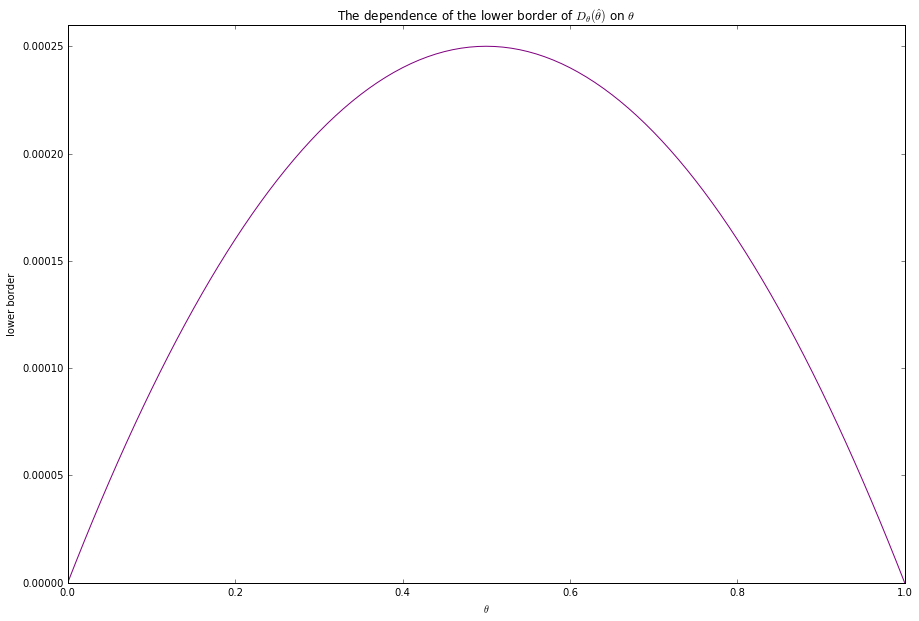

In [3]:
plt.figure(figsize=(15, 10))
plt.plot(grid, lowboard(grid), color='purple', linewidth=1)
plt.title(r'The dependence of the lower border of $D_\theta(\hat{\theta})$ on $\theta$')
plt.xlim((0, 1))
plt.ylim((0, 0.00026))
plt.xlabel(r'$\theta$')
plt.ylabel('lower border')
plt.show()

На графике видно, что чем ближе $\theta$ к 0.5 тем менее точно ее возможно оценить. Также график симметричен относительно 0.5, что вполне естественно, ведь вероятность тоже симметрична относительно 0.5

###  Расчет эффективных и бутстрепных оценок

По критерию получается, что эффективной оценкой для $\theta$ будет $\bar{X}$

In [4]:
bootdisp = list()        #список бутстрепных дисперсий
effeval = list()         #список эффективных оценок
j = 0
for theta in grid:
    sample = sps.bernoulli.rvs(theta, size=n)
    effeval.append(sample.mean())
    booteval = list()        #список бутстрепных оценок
    for i in range(500):
        sample = sps.bernoulli.rvs(effeval[j],size = n)
        booteval.append(sample.mean())
    bootdisp.append(np.var(booteval))
    j+=1

### Построение графика эффективной оценки

Для наглядности, проиллюстрирую на графике эффективную оценку $\theta$

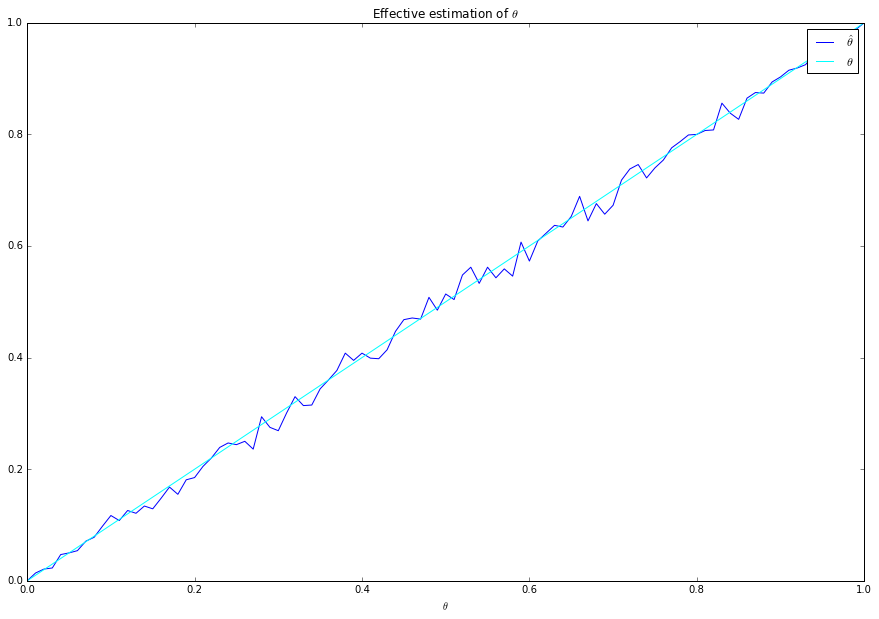

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(grid, effeval, color='blue', linewidth=1, label=r'$\hat{\theta}$')
plt.plot(grid, grid, color='cyan', linewidth=1, label=r'$\theta$')
plt.title(r'Effective estimation of $\theta$')
plt.legend()
plt.xlim((0, 1))
plt.xlabel(r'$\theta$')
plt.show()

На графике видно что оценку вполне естественно считать "хорошей", так как её отклонение от $\theta$ мало.

### Построение графика бутстрепной оценки дисперсии

Для наглядности нанесу на график не только бутстрепную дисперсию, но и нижнюю оценку дисперсии из п1.

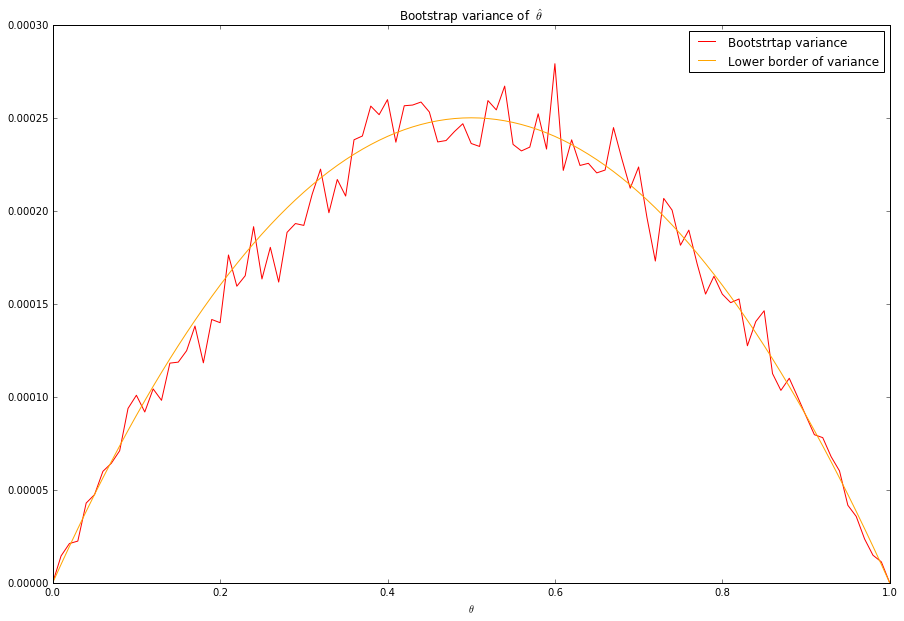

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(grid, bootdisp, color='red', linewidth=1, label='Bootstrtap variance')
plt.plot(grid, lowboard(grid), color='orange', linewidth=1, label='Lower border of variance')
plt.title(r'Bootstrap variance of  $\hat{\theta}$')
plt.legend()
plt.xlim((0, 1))
plt.xlabel(r'$\theta$')
plt.show()

Бутстрепная оценка близка к минимальной, что объясняется тем, что при ее расчете использовалась эффективная оценка $\theta$.